# DevOps/AI combination

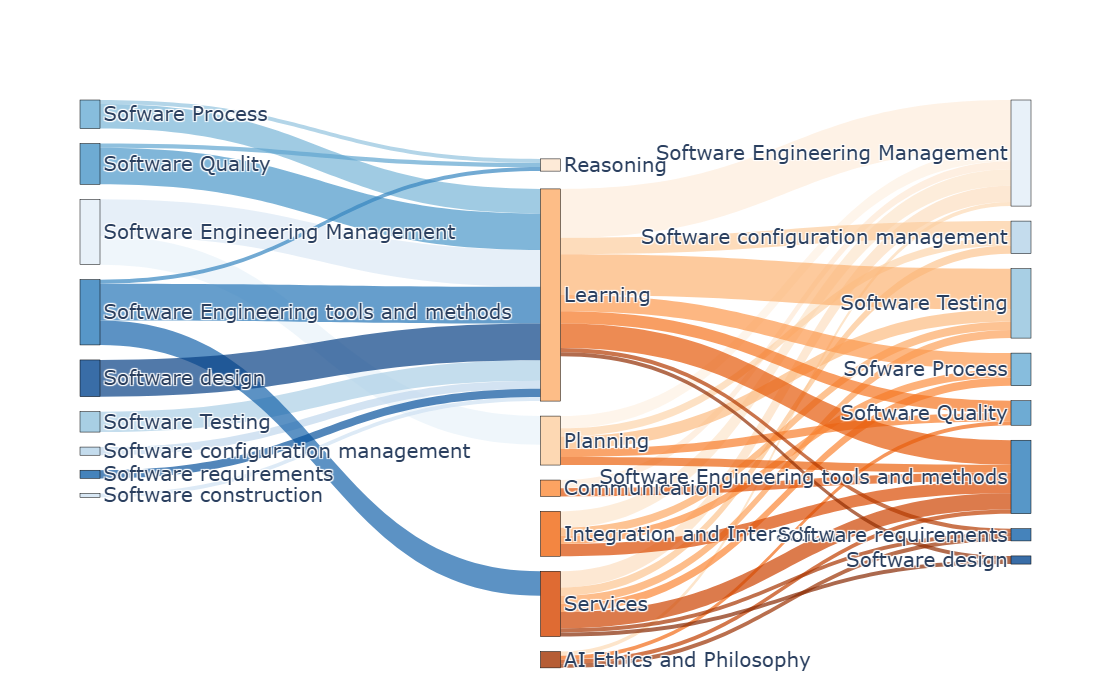

In [58]:
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import io

# -----------------------------------
# 1. Lettura della tabella con le label
# -----------------------------------
# Software Engineering Management		0	Perception		0	Software Engineering Management
# Software construction		0	Perception		0	Software construction
# Software configuration management		0	Perception		0	Software configuration management
# Software Testing		0	Perception		0	Software Testing
# Sofware Process		0	Perception		0	Sofware Process
# Software Quality		0	Perception		0	Software Quality
# Software Engineering tools and methods		0	Perception		0	Software Engineering tools and methods
# Software requirements		0	Perception		0	Software requirements
# Software design		0	Perception		0	Software design

table_data = """DevOps	DevOps/AI	Count	AI	AI/DevOps	Count	DevOps
Software Engineering Management		0	Reasoning		0	Software Engineering Management
Software Engineering Management	[SP18][SP73][SP77][SP93][SP121][SP127][SP130]	7	Planning	[SP23][SP58][SP119]	3	Software Engineering Management
Software Engineering Management	[SP01][SP18][SP73][SP93][SP121][SP127][SP130][SP66][SP101]	9	Learning	[SP04][SP23][SP58][SP67][SP67][SP81][SP88][SP90][SP91][SP119][SP171]	12	Software Engineering Management
Software Engineering Management		0	Communication	[SP24][SP81]	2	Software Engineering Management
Software Engineering Management		0	Integration and Interaction	[SP24][SP51][SP81][SP90]	4	Software Engineering Management
Software Engineering Management		0	Services	[SP24][SP55][SP81][SP90]	4	Software Engineering Management
Software Engineering Management		0	AI Ethics and Philosophy	[SP169]	1	Software Engineering Management
Software construction		0	Reasoning		0	Software construction
Software construction		0	Planning		0	Software construction
Software construction	[SP32]	1	Learning		0	Software construction
Software construction		0	Communication		0	Software construction
Software construction		0	Integration and Interaction		0	Software construction
Software construction		0	Services		0	Software construction
Software construction		0	AI Ethics and Philosophy		0	Software construction
Software configuration management		0	Reasoning		0	Software configuration management
Software configuration management		0	Planning	[SP58][SP88]	2	Software configuration management
Software configuration management	[SP32][SP130]	2	Learning	[SP50][SP58][SP88][SP91]	4	Software configuration management
Software configuration management		0	Communication		0	Software configuration management
Software configuration management		0	Integration and Interaction		0	Software configuration management
Software configuration management		0	Services	[SP50][SP55]	2	Software configuration management
Software configuration management		0	AI Ethics and Philosophy		0	Software configuration management
Software Testing		0	Reasoning		0	Software Testing
Software Testing		0	Planning	[SP02][SP23][SP119]	3	Software Testing
Software Testing	[SP66][SP93][SP101][SP121][SP127]	5	Learning	[SP02][SP04][SP15][SP23][SP29][SP58][SP88][SP91][SP119][SP137]	10	Software Testing
Software Testing		0	Communication		0	Software Testing
Software Testing		0	Integration and Interaction	[SP02][SP29]	2	Software Testing
Software Testing		0	Services	[SP02][SP15]	2	Software Testing
Software Testing		0	AI Ethics and Philosophy		0	Software Testing
Sofware Process	[SP01]	1	Reasoning		0	Sofware Process
Sofware Process		0	Planning		0	Sofware Process
Sofware Process	[SP01][SP121][SP130][SP32][SP66][SP101]	6	Learning	[SP67][SP81][SP90][SP171]	4	Sofware Process
Sofware Process		0	Communication		0	Sofware Process
Sofware Process		0	Integration and Interaction	[SP81][SP90]	2	Sofware Process
Sofware Process		0	Services	[SP81][SP90]	2	Sofware Process
Sofware Process		0	AI Ethics and Philosophy		0	Sofware Process
Software Quality	[SP01]	1	Reasoning		0	Software Quality
Software Quality		0	Planning	[SP39][SP51]	2	Software Quality
Software Quality	[SP01][SP18][SP66][SP93][SP127][SP77][SP101][SP121][SP130]	9	Learning	[SP81][SP169][SP39]	3	Software Quality
Software Quality		0	Communication		0	Software Quality
Software Quality		0	Integration and Interaction		0	Software Quality
Software Quality		0	Services		0	Software Quality
Software Quality		0	AI Ethics and Philosophy	[SP169]	1	Software Quality
Software Engineering tools and methods	[SP77]	1	Reasoning		0	Software Engineering tools and methods
Software Engineering tools and methods		0	Planning	[SP39][SP51]	2	Software Engineering tools and methods
Software Engineering tools and methods	[SP01][SP18][SP32][SP66][SP77][SP101][SP121][SP127][SP130]	9	Learning	[SP29][SP39][SP51][SP81][SP90][SP171]	6	Software Engineering tools and methods
Software Engineering tools and methods		0	Communication	[SP81][SP90]	2	Software Engineering tools and methods
Software Engineering tools and methods		0	Integration and Interaction	[SP29][SP81][SP90]	3	Software Engineering tools and methods
Software Engineering tools and methods	[SP18][SP73][SP93][SP101][SP121][SP127]	6	Services	[SP24][SP51][SP55][SP81]	4	Software Engineering tools and methods
Software Engineering tools and methods		0	AI Ethics and Philosophy	[SP169]	1	Software Engineering tools and methods
Software requirements		0	Reasoning		0	Software requirements
Software requirements		0	Planning		0	Software requirements
Software requirements	[SP73][SP130]	2	Learning	[SP169]	1	Software requirements
Software requirements		0	Communication		0	Software requirements
Software requirements		0	Integration and Interaction		0	Software requirements
Software requirements		0	Services	[SP169]	1	Software requirements
Software requirements		0	AI Ethics and Philosophy	[SP169]	1	Software requirements
Software design		0	Reasoning		0	Software design
Software design		0	Planning		0	Software design
Software design	[SP77][SP101][SP18][SP32][SP73][SP77][SP93][SP127][SP130]	9	Learning	[SP51]	1	Software design
Software design		0	Communication		0	Software design
Software design		0	Integration and Interaction		0	Software design
Software design		0	Services	[SP51]	1	Software design
Software design		0	AI Ethics and Philosophy		0	Software design
"""

# Leggiamo la tabella: il separatore è il tab e assegniamo i nomi alle colonne
df = pd.read_csv(io.StringIO(table_data), sep="\t")
df.columns = ["devops_left", "label_left", "count_left", "ai", "label_right", "count_ai", "devops_right"]

# -----------------------------------
# 2. Definizione dei nodi
# -----------------------------------
# Elenco dei nodi DevOps (sinistra e destra)
nodes_DevOps = [
    "Software Engineering Management",
    "Software construction",
    "Software configuration management",
    "Software Testing",
    "Sofware Process",
    "Software Quality",
    "Software Engineering tools and methods",
    "Software requirements",
    "Software design"
]

# Nodi AI (gruppo centrale)
nodes_AI = [
    "Reasoning",
    "Planning",
    "Learning",
    "Communication",
    # "Perception",
    "Integration and Interaction",
    "Services",
    "AI Ethics and Philosophy"
]

# I nodi di arrivo (DevOps finali) sono uguali a quelli iniziali
nodes_DevOps_final = nodes_DevOps.copy()

# Combiniamo tutti i nodi in un unico elenco
node_labels = nodes_DevOps + nodes_AI + nodes_DevOps_final

# --- Colorazione dei nodi usando Seaborn ---
# Creiamo palette per ciascun gruppo:
palette_left_nodes = sns.color_palette("Blues", len(nodes_DevOps))
palette_mid_nodes  = sns.color_palette("Oranges", len(nodes_AI))
palette_right_nodes = sns.color_palette("Blues", len(nodes_DevOps_final))

# Funzione per convertire i colori della palette in stringhe RGBA
def convert_palette(palette, alpha=0.8):
    return [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {alpha})" for (r, g, b) in palette]

node_colors_left  = convert_palette(palette_left_nodes, 0.8)
node_colors_mid   = convert_palette(palette_mid_nodes, 0.8)
node_colors_right = convert_palette(palette_right_nodes, 0.8)
node_colors = node_colors_left + node_colors_mid + node_colors_right

# Posizionamento manuale dei nodi in 3 colonne
def get_y_positions(n):
    return [i / (n + 1) for i in range(1, n+1)]

n_left = len(nodes_DevOps)         # 9 nodi
n_mid  = len(nodes_AI)             # 8 nodi
n_right= len(nodes_DevOps_final)    # 9 nodi

node_x = ([0.0] * n_left) + ([0.5] * n_mid) + ([1.0] * n_right)
node_y = get_y_positions(n_left) + get_y_positions(n_mid) + get_y_positions(n_right)

# -----------------------------------
# 3. Creazione dei flussi (link)
# -----------------------------------
# Useremo due gruppi di colori per i flussi:
#  - Flussi DevOps->AI: tonalità di blu
#  - Flussi AI->DevOps: tonalità di arancione
# Per generare le palette usiamo Seaborn.
n_left_flows  = df[df["count_left"] > 0].shape[0]
n_right_flows = df[df["count_ai"] > 0].shape[0]
palette_left_links  = sns.color_palette("Blues", n_left_flows)
palette_right_links = sns.color_palette("Oranges", n_right_flows)

# Convertiamo in RGBA (con alpha 0.7 per i link)
def convert_palette_links(palette, alpha=0.7):
    return [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {alpha})" for (r, g, b) in palette]

colors_left_links  = convert_palette_links(palette_left_links, 0.7)
colors_right_links = convert_palette_links(palette_right_links, 0.7)

# Inizializziamo liste per flussi e contatori per assegnare i colori correttamente
link_sources = []
link_targets = []
link_values  = []
link_customdata = []  # Qui memorizzeremo le label prese dalla tabella
link_colors  = []

# Offset per i nodi del gruppo centrale e finale
offset_AI = len(nodes_DevOps)                    # i nodi AI iniziano a indice = len(nodes_DevOps)
offset_DevOps_final = len(nodes_DevOps) + len(nodes_AI)  # i nodi finali partono da qui

left_flow_counter = 0
right_flow_counter = 0

for _, row in df.iterrows():
    # Flusso da DevOps (sinistra) a AI (centro)
    if row["count_left"] > 0:
        try:
            source_index = nodes_DevOps.index(row["devops_left"])
            target_index = nodes_AI.index(row["ai"])
        except ValueError:
            continue  # Se non troviamo il nodo, saltiamo la riga
        link_sources.append(source_index)
        link_targets.append(offset_AI + target_index)
        link_values.append(row["count_left"])
        # Usa la label dalla colonna "label_left"
        link_customdata.append(row["label_left"])
        # Assegna colore dalla palette dei flussi sinistri e incrementa il contatore
        link_colors.append(colors_left_links[left_flow_counter])
        left_flow_counter += 1
    
    # Flusso da AI (centro) a DevOps (destra)
    if row["count_ai"] > 0:
        try:
            source_index = nodes_AI.index(row["ai"])
            target_index = nodes_DevOps_final.index(row["devops_right"])
        except ValueError:
            continue
        link_sources.append(offset_AI + source_index)
        link_targets.append(offset_DevOps_final + target_index)
        link_values.append(row["count_ai"])
        # Usa la label dalla colonna "label_right"
        link_customdata.append(row["label_right"])
        # Assegna colore dalla palette dei flussi destri e incrementa il contatore
        link_colors.append(colors_right_links[right_flow_counter])
        right_flow_counter += 1

# -----------------------------------
# 4. Creazione del diagramma Sankey
# -----------------------------------
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",  # Rispetta le posizioni x e y fornite
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors,
        x=node_x,
        y=node_y
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values,
        customdata=link_customdata,
        color=link_colors,
        hovertemplate=(
            "Flusso: %{customdata}<br>" +
            "Da: %{source.label}<br>" +
            "A: %{target.label}<br>" +
            "Valore: %{value}<br>" +
            "<extra></extra>"
        )
    )
)])

fig.update_layout(
    font_size=20,
    width=1400,
    height=700
)

fig.show()

# Salva il diagramma in formato PNG (assicurati di avere kaleido o orca installato)
fig.write_image("devops_ai_sankey.png", engine="orca")

# Salva anche il diagramma in formato HTML interattivo
fig.write_html("devops_ai_sankey.html")


# MDE/AI combination

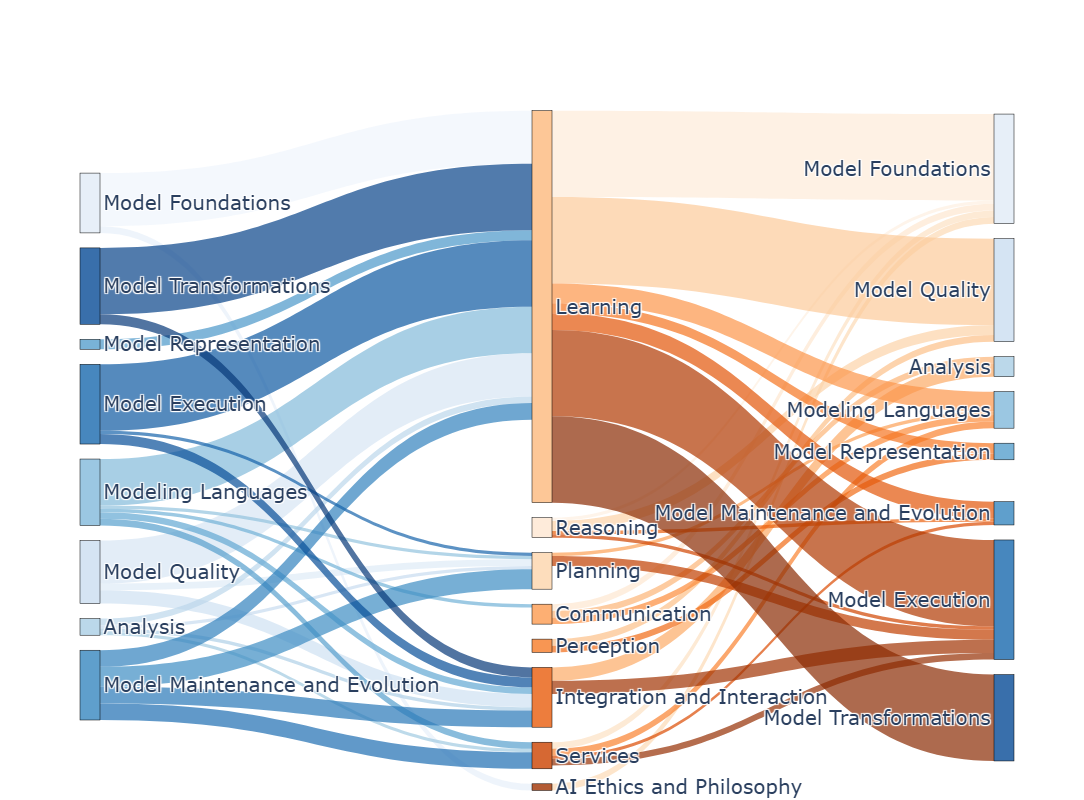

In [61]:
import plotly.graph_objects as go
import seaborn as sns

# -------------------------------
# 1. Definizione dei nodi
# -------------------------------
nodes_MDE = [
    "Model Foundations",
    "Model Quality",
    "Analysis",
    "Modeling Languages",
    "Model Representation",
    "Model Maintenance and Evolution",
    "Model Execution",
    "Model Transformations"
]

nodes_AI = [
    "Reasoning",
    "Planning",
    "Learning",
    "Communication",
    "Perception",
    "Integration and Interaction",
    "Services",
    "AI Ethics and Philosophy"
]

# I nodi finali MDE sono uguali a quelli iniziali
nodes_MDE_final = nodes_MDE.copy()

# Unione in un’unica lista (per i tooltip e la legenda)
node_labels = nodes_MDE + nodes_AI + nodes_MDE_final

# Funzione per convertire una palette Seaborn in una lista di colori RGBA
def convert_palette(palette, alpha=0.8):
    return [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {alpha})" for (r, g, b) in palette]

# -------------------------------
# 2. Definizione dei flussi
# -------------------------------
# I flussi sono definiti partendo dalla tabella in cui:
# - La colonna "MDE/AI" (se non "-" e count > 0) definisce un flusso in uscita da un nodo MDE verso un nodo AI.
# - La colonna "AI/MDE" (se non "-" e count > 0) definisce un flusso in ingresso in un nodo MDE finale, proveniente da un nodo AI.
#
# Gli indici dei nodi sono:
#   MDE iniziali: 0-7
#   AI: 8-15 (ordine: Reasoning, Planning, Learning, Communication, Perception, Integration and Interaction, Services, AI Ethics and Philosophy)
#   MDE finali: 16-23 (stesso ordine di nodes_MDE)
#
# --- Flussi MDE → AI (24 flussi) ---
# (La posizione della riga nella tabella è indicata tra parentesi)

link_sources_1 = [
    0,  # Row 3: Model Foundations
    0,  # Row 8: Model Foundations
    1,  # Row 10: Model Quality
    1,  # Row 11: Model Quality
    1,  # Row 14: Model Quality
    2,  # Row 18: Analysis
    2,  # Row 19: Analysis
    2,  # Row 22: Analysis
    2,  # Row 23: Analysis
    3,  # Row 26: Modeling Languages
    3,  # Row 27: Modeling Languages
    3,  # Row 28: Modeling Languages
    3,  # Row 30: Modeling Languages
    3,  # Row 31: Modeling Languages
    4,  # Row 35: Model Representation
    5,  # Row 42: Model Maintenance and Evolution
    5,  # Row 43: Model Maintenance and Evolution
    5,  # Row 46: Model Maintenance and Evolution
    5,  # Row 47: Model Maintenance and Evolution
    6,  # Row 50: Model Execution
    6,  # Row 51: Model Execution
    6,  # Row 54: Model Execution
    7,  # Row 57: Model Transformations
    7   # Row 62: Model Transformations
]

link_targets_1 = [
    10, # Row 3: Learning (8+2)
    15, # Row 8: AI Ethics and Philosophy (8+7)
    9,  # Row 10: Planning (8+1)
    10, # Row 11: Learning (8+2)
    13, # Row 14: Integration and Interaction (8+5)
    9,  # Row 18: Planning
    10, # Row 19: Learning
    13, # Row 22: Integration and Interaction
    14, # Row 23: Services (8+6)
    9,  # Row 26: Planning
    10, # Row 27: Learning
    11, # Row 28: Communication (8+3)
    13, # Row 30: Integration and Interaction
    14, # Row 31: Services
    10, # Row 35: Learning
    9,  # Row 42: Planning
    10, # Row 43: Learning
    13, # Row 46: Integration and Interaction
    14, # Row 47: Services
    9,  # Row 50: Planning
    10, # Row 51: Learning
    13, # Row 54: Integration and Interaction
    10, # Row 57: Learning
    13  # Row 62: Integration and Interaction
]

link_values_1 = [
    16, # Row 3
    2,  # Row 8
    2,  # Row 10
    13, # Row 11
    4,  # Row 14
    1,  # Row 18
    2,  # Row 19
    1,  # Row 22
    1,  # Row 23
    1,  # Row 26
    14, # Row 27
    1,  # Row 28
    2,  # Row 30
    2,  # Row 31
    3,  # Row 35
    6,  # Row 42
    5,  # Row 43
    5,  # Row 46
    5,  # Row 47
    1,  # Row 50
    20, # Row 51
    3,  # Row 54
    20, # Row 57
    3   # Row 62
]

link_labels_1 = [
    "[SP3][SP13][SP20][SP28][SP32][SP47][SP67][SP69][SP92][SP101][SP104][SP105][SP111][SP115][SP147][SP171]",  # Row 3
    "[SP13][SP40]",                                                                                              # Row 8
    "[SP93][104]",                                                                                               # Row 10
    "[SP3][SP10][SP13][SP28][SP47][SP52][SP64][SP67][SP76][SP93][SP101][SP170][SP171]",                            # Row 11
    "[SP40][SP98][SP115][SP146]",                                                                                  # Row 14
    "[SP10]",                                                                                                     # Row 18
    "[SP52][SP170]",                                                                                              # Row 19
    "[SP40]",                                                                                                     # Row 22
    "[SP64]",                                                                                                     # Row 23
    "[SP98]",                                                                                                     # Row 26
    "[SP10][SP28][SP32][SP64][SP76][SP69][SP92][SP93][SP104][SP105][SP111][SP115][SP147][SP171]",                    # Row 27
    "[SP3]",                                                                                                      # Row 28
    "[SP32][SP146]",                                                                                              # Row 30
    "[SP93][SP101]",                                                                                              # Row 31
    "[SP3][SP28][SP69]",                                                                                           # Row 35
    "[SP20][SP52][SP111][SP147][SP170][171]",                                                                      # Row 42
    "[SP3][SP20][SP67][SP76][SP101]",                                                                              # Row 43
    "[SP13][SP20][SP40][SP98][SP146]",                                                                             # Row 46
    "[SP10][SP40][SP92][SP98][SP146]",                                                                             # Row 47
    "[SP67]",                                                                                                     # Row 50
    "[SP10][SP13][SP20][SP32][SP47][SP52][SP64][SP67][SP69][SP76][SP92][SP93][SP101][SP104][SP105][SP111][SP115][SP147][SP170][SP171]",  # Row 51
    "[SP40][SP98][SP146]",                                                                                         # Row 54
    "[SP10][SP13][SP20][SP32][SP47][SP52][SP64][SP67][SP69][SP76][SP92][SP93][SP101][SP104][SP105][SP111][SP115][SP147][SP170][SP171]",  # Row 57
    "[SP40][SP98][SP146]"                                                                                          # Row 62
]

# --- Flussi AI → MDE (25 flussi) ---
link_sources_2 = [
    8,  # Row 1: Reasoning
    10, # Row 3: Learning
    11, # Row 4: Communication
    14, # Row 7: Services
    15, # Row 8: AI Ethics and Philosophy
    8,  # Row 9: Reasoning
    10, # Row 11: Learning
    12, # Row 13: Perception
    11, # Row 20: Communication
    13, # Row 22: Integration and Interaction
    9,  # Row 26: Planning
    10, # Row 27: Learning
    11, # Row 28: Communication
    14, # Row 31: Services
    10, # Row 35: Learning
    12, # Row 37: Perception
    8,  # Row 41: Reasoning
    10, # Row 43: Learning
    14, # Row 47: Services
    8,  # Row 49: Reasoning
    9,  # Row 50: Planning
    10, # Row 51: Learning
    13, # Row 54: Integration and Interaction
    14, # Row 55: Services
    10  # Row 59: Learning
]

link_targets_2 = [
    16, # Row 1: Model Foundations (final)
    16, # Row 3: Model Foundations (final)
    16, # Row 4: Model Foundations (final)
    16, # Row 7: Model Foundations (final)
    16, # Row 8: Model Foundations (final)
    17, # Row 9: Model Quality (final)
    17, # Row 11: Model Quality (final)
    17, # Row 13: Model Quality (final)
    18, # Row 20: Analysis (final)
    18, # Row 22: Analysis (final)
    19, # Row 26: Modeling Languages (final)
    19, # Row 27: Modeling Languages (final)
    19, # Row 28: Modeling Languages (final)
    19, # Row 31: Modeling Languages (final)
    20, # Row 35: Model Representation (final)
    20, # Row 37: Model Representation (final)
    21, # Row 41: Model Maintenance and Evolution (final)
    21, # Row 43: Model Maintenance and Evolution (final)
    21, # Row 47: Model Maintenance and Evolution (final)
    22, # Row 49: Model Execution (final)
    22, # Row 50: Model Execution (final)
    22, # Row 51: Model Execution (final)
    22, # Row 54: Model Execution (final)
    22, # Row 55: Model Execution (final)
    23  # Row 59: Model Transformations (final)
]

link_values_2 = [
    1,  # Row 1
    26, # Row 3
    2,  # Row 4
    2,  # Row 7
    2,  # Row 8
    3,  # Row 9
    26, # Row 11
    2,  # Row 13
    2,  # Row 20
    4,  # Row 22
    1,  # Row 26
    6,  # Row 27
    2,  # Row 28
    2,  # Row 31
    3,  # Row 35
    2,  # Row 37
    1,  # Row 41
    5,  # Row 43
    1,  # Row 47
    1,  # Row 49
    3,  # Row 50
    26, # Row 51
    4,  # Row 54
    2,  # Row 55
    26  # Row 59
]

link_labels_2 = [
    "[SP05]",                                                                                                                             # Row 1
    "[SP5][SP19][SP21][SP36][SP47][SP50][SP57][SP65][SP75][SP79][SP80][SP82][SP84][SP86][SP87][SP94][SP110][SP114][SP115][SP120][SP138][SP139][SP140][SP142][SP152][SP161]",  # Row 3
    "[SP110][SP84]",                                                                                                                      # Row 4
    "[SP94][SP120]",                                                                                                                      # Row 7
    "[SP47][SP84]",                                                                                                                       # Row 8
    "[SP05][SP19][SP79]",                                                                                                                 # Row 9
    "[SP5][SP19][SP21][SP36][SP47][SP50][SP57][SP65][SP75][SP79][SP80][SP82][SP84][SP86][SP87][SP94][SP110][SP114][SP115][SP120][SP138][SP139][SP140][SP142][SP152][SP161]",  # Row 11
    "[SP65][SP75]",                                                                                                                       # Row 13
    "[SP110][SP152]",                                                                                                                     # Row 20
    "[SP75][SP138][SP139][SP142]",                                                                                                          # Row 22
    "[SP94]",                                                                                                                             # Row 26
    "[SP110][SP120][SP36][SP57][SP86][SP152]",                                                                                            # Row 27
    "[SP110][SP161]",                                                                                                                     # Row 28
    "[SP94][SP120]",                                                                                                                      # Row 31
    "[SP36][SP57][SP86]",                                                                                                                  # Row 35
    "[SP65][SP75]",                                                                                                                       # Row 37
    "[SP50]",                                                                                                                             # Row 41
    "[SP82][SP114][SP21][SP65][SP110]",                                                                                                    # Row 43
    "[SP120]",                                                                                                                            # Row 47
    "[SP140]",                                                                                                                            # Row 49
    "[SP65][SP75][SP142]",                                                                                                                 # Row 50
    "[SP5][SP19][SP21][SP36][SP47][SP50][SP57][SP65][SP75][SP79][SP80][SP82][SP84][SP86][SP87][SP94][SP110][SP114][SP115][SP120][SP138][SP139][SP140][SP142][SP152][SP161]",  # Row 51
    "[SP75][SP138][SP139][SP142]",                                                                                                          # Row 54
    "[SP94][SP65]",                                                                                                                       # Row 55
    "[SP5][SP19][SP21][SP36][SP47][SP50][SP57][SP65][SP75][SP79][SP80][SP82][SP84][SP86][SP87][SP94][SP110][SP114][SP115][SP120][SP138][SP139][SP140][SP142][SP152][SP161]"   # Row 59
]

# Unione dei flussi dei due gruppi
link_sources = link_sources_1 + link_sources_2
link_targets = link_targets_1 + link_targets_2
link_values  = link_values_1  + link_values_2
link_labels  = link_labels_1  + link_labels_2

# -------------------------------
# 3. Colorazione dei nodi e dei flussi
# -------------------------------
# Colori per i nodi: usiamo sns.color_palette "Blues" per MDE e "Oranges" per AI
node_colors = (convert_palette(sns.color_palette("Blues", len(nodes_MDE)), 0.8) +
               convert_palette(sns.color_palette("Oranges", len(nodes_AI)), 0.8) +
               convert_palette(sns.color_palette("Blues", len(nodes_MDE_final)), 0.8))

# Colori per i flussi
n_links1 = len(link_values_1)
palette_left_links = sns.color_palette("Blues", n_links1)
link_colors_1 = [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)" for (r, g, b) in palette_left_links]

n_links2 = len(link_values_2)
palette_right_links = sns.color_palette("Oranges", n_links2)
link_colors_2 = [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)" for (r, g, b) in palette_right_links]

link_colors = link_colors_1 + link_colors_2

# Posizionamento manuale dei nodi in 3 colonne
def get_y_positions(n):
    return [i/(n+1) for i in range(1, n+1)]

n_left  = len(nodes_MDE)
n_mid   = len(nodes_AI)
n_right = len(nodes_MDE_final)
node_x = ([0.0] * n_left) + ([0.5] * n_mid) + ([1.0] * n_right)
node_y = get_y_positions(n_left) + get_y_positions(n_mid) + get_y_positions(n_right)

# -------------------------------
# 4. Creazione del diagramma Sankey
# -------------------------------
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",  # Usa le posizioni x e y specificate
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors,
        x=node_x,
        y=node_y
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values,
        customdata=link_labels,
        color=link_colors,
        hovertemplate=(
            "Flusso: %{customdata}<br>" +
            "Da: %{source.label}<br>" +
            "A: %{target.label}<br>" +
            "Valore: %{value}<br>" +
            "<extra></extra>"
        )
    )
)])

fig.update_layout(font_size=20, width=1400, height=800)
fig.show()

# Salvataggio in PNG e HTML
fig.write_image("mde_ai_sankey.png", engine="orca")
fig.write_html("mde_ai_sankey.html")


# MDE/DevOps Combination

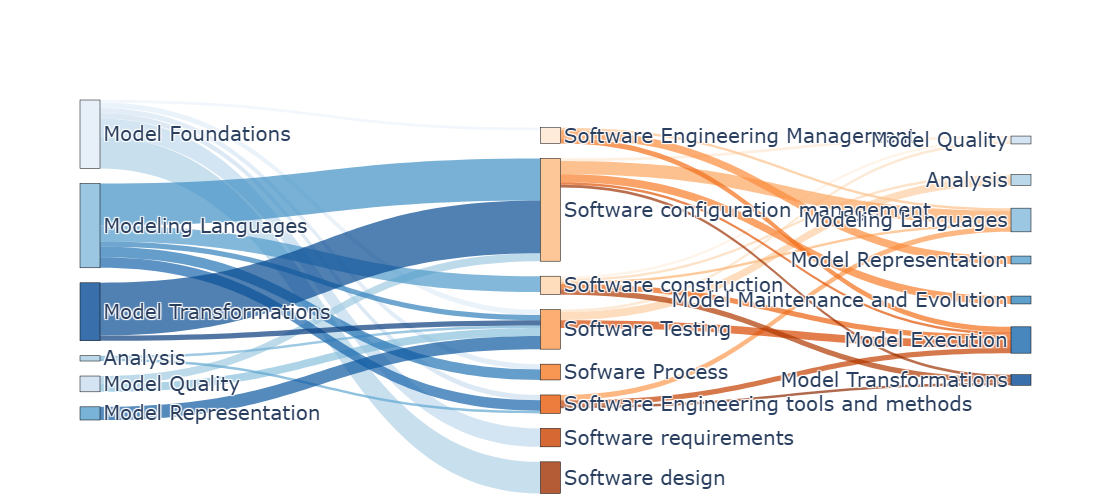

In [64]:
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import io

# -----------------------------------
# 1. Lettura della tabella
# -----------------------------------
# Model Foundations\t-\t0\tSoftware Quality\t-\t0\tModel Foundations
# Model Quality\t-\t0\tSoftware Quality\t-\t0\tModel Quality
# Analysis\t-\t0\tSoftware Quality\t-\t0\tAnalysis
# Modeling Languages\t-\t0\tSoftware Quality\t-\t0\tModeling Languages
# Model Representation\t-\t0\tSoftware Quality\t-\t0\tModel Representation
# Model Maintenance and Evolution\t-\t0\tSoftware Quality\t-\t0\tModel Maintenance and Evolution
# Model Execution\t-\t0\tSoftware Quality\t-\t0\tModel Execution
# Model Transformations\t-\t0\tSoftware Quality\t-\t0\tModel Transformations

table_data = """MDE\tMDE/DevOps\tCount\tDevops\tDevops/MDE\tCount\tMDE
Model Foundations\tSP7\t1\tSoftware Engineering Management\t-\t0\tModel Foundations
Model Foundations\t-\t0\tSoftware construction\t-\t0\tModel Foundations
Model Foundations\t-\t0\tSoftware configuration management\t-\t0\tModel Foundations
Model Foundations\tSP16; SP126\t2\tSoftware Testing\t-\t0\tModel Foundations
Model Foundations\tSP13; SP43\t2\tSofware Process\t-\t0\tModel Foundations
Model Foundations\tSP7; SP50\t2\tSoftware Engineering tools and methods\t-\t0\tModel Foundations
Model Foundations\tSP11; SP13; SP84; SP96; SP157; SP158; SP163\t7\tSoftware requirements\t-\t0\tModel Foundations
Model Foundations\tSP6; SP7; SP10; SP40; SP41; SP52; SP59; SP68; SP83; SP144; SP151; SP165\t12\tSoftware design\t-\t0\tModel Foundations
Model Quality\t-\t0\tSoftware Engineering Management\t-\t0\tModel Quality
Model Quality\t-\t0\tSoftware construction\tSP14\t1\tModel Quality
Model Quality\tSP48; SP49; SP50; SP33\t3\tSoftware configuration management\tSP56\t1\tModel Quality
Model Quality\tSP50; SP26; SP94\t3\tSoftware Testing\tSP34\t1\tModel Quality
Model Quality\t-\t0\tSofware Process\t-\t0\tModel Quality
Model Quality\t-\t0\tSoftware Engineering tools and methods\t-\t0\tModel Quality
Model Quality\t-\t0\tSoftware requirements\t-\t0\tModel Quality
Model Quality\t-\t0\tSoftware design\t-\t0\tModel Quality
Analysis\t-\t0\tSoftware Engineering Management\t-\t0\tAnalysis
Analysis\t-\t0\tSoftware construction\tSP107\t1\tAnalysis
Analysis\t-\t0\tSoftware configuration management\t-\t0\tAnalysis
Analysis\tSP44\t1\tSoftware Testing\tSP22, SP107, SP143\t3\tAnalysis
Analysis\t-\t0\tSofware Process\t-\t0\tAnalysis
Analysis\tSP170\t1\tSoftware Engineering tools and methods\t-\t0\tAnalysis
Analysis\t-\t0\tSoftware requirements\t-\t0\tAnalysis
Analysis\t-\t0\tSoftware design\t-\t0\tAnalysis
Modeling Languages\t-\t0\tSoftware Engineering Management\tSP42\t1\tModeling Languages
Modeling Languages\tSP9; SP71; SP106; SP123; SP153; SP160\t6\tSoftware construction\tSP167\t1\tModeling Languages
Modeling Languages\tSP12;SP63; SP101; SP30; SP32; SP42; SP72; SP89; SP107; SP166; SP168;SP45; SP46; SP53; SP124; SP128\t16\tSoftware configuration management\tSP53, SP109,SP155, SP89, SP131\t5\tModeling Languages
Modeling Languages\tSP143; SP150\t2\tSoftware Testing\t-\t0\tModeling Languages
Modeling Languages\tSP63; SP25; SP74; SP148\t4\tSofware Process\t-\t0\tModeling Languages
Modeling Languages\tSP8; SP27;SP18; SP93\t4\tSoftware Engineering tools and methods\tSP63, SP156\t2\tModeling Languages
Modeling Languages\t-\t0\tSoftware requirements\t-\t0\tModeling Languages
Modeling Languages\t-\t0\tSoftware design\t-\t0\tModeling Languages
Model Representation\t-\t0\tSoftware Engineering Management\tSP162, SP145, SP165\t3\tModel Representation
Model Representation\t-\t0\tSoftware construction\t-\t0\tModel Representation
Model Representation\t-\t0\tSoftware configuration management\t-\t0\tModel Representation
Model Representation\tSP25; SP85; SP108; SP125; SP162\t5\tSoftware Testing\t-\t0\tModel Representation
Model Representation\t-\t0\tSofware Process\t-\t0\tModel Representation
Model Representation\t-\t0\tSoftware Engineering tools and methods\t-\t0\tModel Representation
Model Representation\t-\t0\tSoftware requirements\t-\t0\tModel Representation
Model Representation\t-\t0\tSoftware design\t-\t0\tModel Representation
Model Maintenance and Evolution\t-\t0\tSoftware Engineering Management\t-\t0\tModel Maintenance and Evolution
Model Maintenance and Evolution\t-\t0\tSoftware construction\t-\t0\tModel Maintenance and Evolution
Model Maintenance and Evolution\t-\t0\tSoftware configuration management\tSP89, SP131, SP99\t3\tModel Maintenance and Evolution
Model Maintenance and Evolution\t-\t0\tSoftware Testing\t-\t0\tModel Maintenance and Evolution
Model Maintenance and Evolution\t-\t0\tSofware Process\t-\t0\tModel Maintenance and Evolution
Model Maintenance and Evolution\t-\t0\tSoftware Engineering tools and methods\t-\t0\tModel Maintenance and Evolution
Model Maintenance and Evolution\t-\t0\tSoftware requirements\t-\t0\tModel Maintenance and Evolution
Model Maintenance and Evolution\t-\t0\tSoftware design\t-\t0\tModel Maintenance and Evolution
Model Execution\t-\t0\tSoftware Engineering Management\tSP145, SP165\t2\tModel Execution
Model Execution\t-\t0\tSoftware construction\tSP107, SP167\t2\tModel Execution
Model Execution\t-\t0\tSoftware configuration management\tSP56\t1\tModel Execution
Model Execution\t-\t0\tSoftware Testing\tSP34, SP107, SP143\t3\tModel Execution
Model Execution\t-\t0\tSofware Process\t-\t0\tModel Execution
Model Execution\t-\t0\tSoftware Engineering tools and methods\tSP156, SP164\t2\tModel Execution
Model Execution\t-\t0\tSoftware requirements\t-\t0\tModel Execution
Model Execution\t-\t0\tSoftware design\t-\t0\tModel Execution
Model Transformations\t-\t0\tSoftware Engineering Management\t-\t0\tModel Transformations
Model Transformations\t-\t0\tSoftware construction\tSP54, SP78\t2\tModel Transformations
Model Transformations\tSP20; SP31; SP35; SP37; SP113; SP116; SP131; SP132; SP133; SP134; SP149; SP159; SP161;SP59; SP118; SP154;SP59;SP95; SP100; SP102\t20\tSoftware configuration management\tSP99\t1\tModel Transformations
Model Transformations\tSP38; SP142\t2\tSoftware Testing\t-\t0\tModel Transformations
Model Transformations\t-\t0\tSofware Process\t-\t0\tModel Transformations
Model Transformations\t-\t0\tSoftware Engineering tools and methods\tSP164\t1\tModel Transformations
Model Transformations\t-\t0\tSoftware requirements\t-\t0\tModel Transformations
Model Transformations\t-\t0\tSoftware design\t-\t0\tModel Transformations
"""

# Leggiamo la tabella; il separatore è il tab e assegniamo i nomi alle colonne
df = pd.read_csv(io.StringIO(table_data), sep="\t")
df.columns = ["mde_left", "label_left", "count_left", "devops", "label_right", "count_right", "mde_right"]

# -----------------------------------
# 2. Definizione dei nodi (manuale)
# -----------------------------------
# I nodi MDE (gruppo sinistro) li definiamo manualmente
nodes_MDE = [
    "Model Foundations",
    "Model Quality",
    "Analysis",
    "Modeling Languages",
    "Model Representation",
    "Model Maintenance and Evolution",
    "Model Execution",
    "Model Transformations"
]

# I nodi DevOps (gruppo centrale)
nodes_Devops = [
    "Software Engineering Management",
    "Software construction",
    "Software configuration management",
    "Software Testing",
    "Sofware Process",
    # "Software Quality",
    "Software Engineering tools and methods",
    "Software requirements",
    "Software design"
]

# I nodi finali MDE (gruppo di destra) sono uguali a quelli MDE
nodes_MDE_final = nodes_MDE.copy()

# Combiniamo in un’unica lista: gruppo sinistro, gruppo centrale, gruppo destro
node_labels = nodes_MDE + nodes_Devops + nodes_MDE_final

# --- Colorazione dei nodi usando Seaborn ---
def convert_palette(palette, alpha=0.8):
    return [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {alpha})" for (r, g, b) in palette]

palette_left_nodes = sns.color_palette("Blues", len(nodes_MDE))
palette_mid_nodes  = sns.color_palette("Oranges", len(nodes_Devops))
palette_right_nodes = sns.color_palette("Blues", len(nodes_MDE_final))

node_colors = convert_palette(palette_left_nodes, 0.8) + convert_palette(palette_mid_nodes, 0.8) + convert_palette(palette_right_nodes, 0.8)

# Posizionamento manuale dei nodi in 3 colonne: sinistra (x=0.0), centro (x=0.5), destra (x=1.0)
def get_y_positions(n):
    return [i / (n + 1) for i in range(1, n+1)]

n_left = len(nodes_MDE) - 2        # 8 nodi
n_mid  = len(nodes_Devops)       # 8 nodi
n_right = len(nodes_MDE_final) - 1   # 8 nodi

node_x = ([0.0] * n_left) + ([0.5] * n_mid) + ([1.0] * n_right)
node_y = get_y_positions(n_left) + get_y_positions(n_mid) + get_y_positions(n_right)

# -----------------------------------
# 3. Creazione dei flussi (link)
# -----------------------------------
# Per i flussi MDE -> DevOps (dal gruppo sinistro a quello centrale)
n_left_flows = df[df["count_left"] > 0].shape[0]
palette_left_links = sns.color_palette("Blues", n_left_flows)
def convert_palette_links(palette, alpha=0.7):
    return [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {alpha})" for (r, g, b) in palette]
colors_left_links = convert_palette_links(palette_left_links, 0.7)

# Per i flussi DevOps -> MDE (dal gruppo centrale a quello destro)
n_right_flows = df[df["count_right"] > 0].shape[0]
palette_right_links = sns.color_palette("Oranges", n_right_flows)
colors_right_links = convert_palette_links(palette_right_links, 0.7)

link_sources = []
link_targets = []
link_values  = []
link_customdata = []  # memorizziamo le label (dalle colonne "label_left" o "label_right")
link_colors  = []

# Offset per i gruppi:
# I nodi del gruppo centrale iniziano da indice = len(nodes_MDE) (cioè 8)
# I nodi del gruppo destro iniziano da indice = len(nodes_MDE) + len(nodes_Devops) (8 + 9 = 17)
offset_Devops = len(nodes_MDE)
offset_MDE_final = len(nodes_MDE) + len(nodes_Devops)

left_flow_counter = 0
right_flow_counter = 0

for _, row in df.iterrows():
    # Flusso da MDE (sinistra) a DevOps (centro)
    if row["count_left"] > 0:
        try:
            source_index = nodes_MDE.index(row["mde_left"])
            target_index = nodes_Devops.index(row["devops"])
        except ValueError:
            continue
        link_sources.append(source_index)
        link_targets.append(offset_Devops + target_index)
        link_values.append(row["count_left"])
        link_customdata.append(row["label_left"])  # Label dal campo MDE/DevOps
        link_colors.append(colors_left_links[left_flow_counter])
        left_flow_counter += 1
    # Flusso da DevOps (centro) a MDE (destra)
    if row["count_right"] > 0:
        try:
            source_index = nodes_Devops.index(row["devops"])
            target_index = nodes_MDE_final.index(row["mde_right"])
        except ValueError:
            continue
        link_sources.append(offset_Devops + source_index)
        link_targets.append(offset_MDE_final + target_index)
        link_values.append(row["count_right"])
        link_customdata.append(row["label_right"])  # Label dal campo Devops/MDE
        link_colors.append(colors_right_links[right_flow_counter])
        right_flow_counter += 1

# -----------------------------------
# 4. Creazione del diagramma Sankey
# -----------------------------------
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",  # Rispetta le posizioni fornite
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors,
        x=node_x,
        y=node_y
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values,
        customdata=link_customdata,
        color=link_colors,
        hovertemplate=(
            "Label: %{customdata}<br>" +
            "Da: %{source.label}<br>" +
            "A: %{target.label}<br>" +
            "Valore: %{value}<br>" +
            "<extra></extra>"
        )
    )
)])

fig.update_layout(
    font_size=20,
    width=1400,
    height=500
)

fig.show()

# Salva il diagramma in PNG (assicurati di avere kaleido o orca installato)
fig.write_image("devops_mde_sankey.png", engine="orca")

# Salva anche il diagramma in HTML interattivo
fig.write_html("devops_mde_sankey.html")

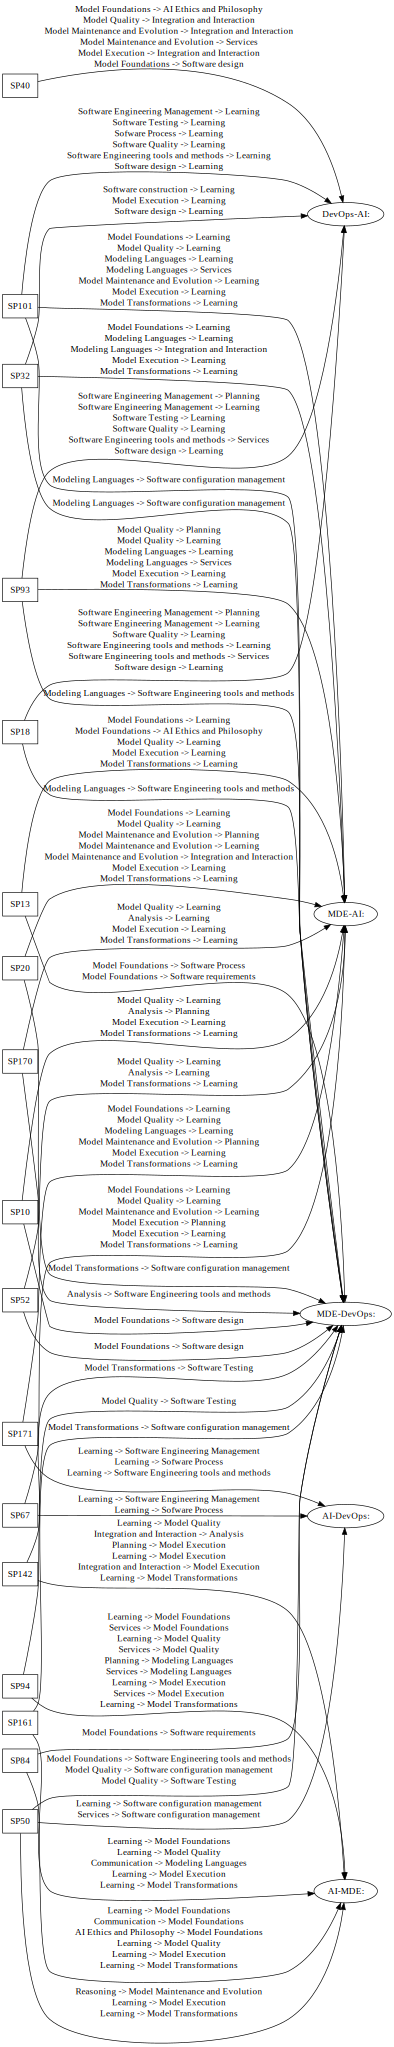

In [13]:
from graphviz import Source

dot_code = r"""
digraph G {
  // Orientamento da sinistra a destra
  rankdir=LR;

  // Nodi degli ID (forma box)
  node [shape=box];
  "SP10"; "SP13"; "SP18"; "SP20"; "SP32"; "SP40"; "SP50";
  "SP52"; "SP67"; "SP84"; "SP93"; "SP94"; "SP101"; "SP142";
  "SP161"; "SP170"; "SP171";

  // Nodi delle categorie (forma ellisse)
  node [shape=ellipse];
  "MDE-AI:"; "MDE-DevOps:"; "DevOps-AI:"; "AI-MDE:"; "AI-DevOps:";

  // -------------------------------------------------
  // SP10
  "SP10" -> "MDE-AI:" [label="Model Quality -> Learning\nAnalysis -> Planning\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP10" -> "MDE-DevOps:" [label="Model Foundations -> Software design"];

  // -------------------------------------------------
  // SP13
  "SP13" -> "MDE-AI:" [label="Model Foundations -> Learning\nModel Foundations -> AI Ethics and Philosophy\nModel Quality -> Learning\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP13" -> "MDE-DevOps:" [label="Model Foundations -> Software Process\nModel Foundations -> Software requirements"];

  // -------------------------------------------------
  // SP18
  "SP18" -> "MDE-DevOps:" [label="Modeling Languages -> Software Engineering tools and methods"];
  "SP18" -> "DevOps-AI:" [label="Software Engineering Management -> Planning\nSoftware Engineering Management -> Learning\nSoftware Quality -> Learning\nSoftware Engineering tools and methods -> Learning\nSoftware Engineering tools and methods -> Services\nSoftware design -> Learning"];

  // -------------------------------------------------
  // SP20
  "SP20" -> "MDE-AI:" [label="Model Foundations -> Learning\nModel Quality -> Learning\nModel Maintenance and Evolution -> Planning\nModel Maintenance and Evolution -> Learning\nModel Maintenance and Evolution -> Integration and Interaction\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP20" -> "MDE-DevOps:" [label="Model Transformations -> Software configuration management"];

  // -------------------------------------------------
  // SP32
  "SP32" -> "MDE-AI:" [label="Model Foundations -> Learning\nModeling Languages -> Learning\nModeling Languages -> Integration and Interaction\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP32" -> "MDE-DevOps:" [label="Modeling Languages -> Software configuration management"];
  "SP32" -> "DevOps-AI:" [label="Software construction -> Learning\nModel Execution -> Learning\nSoftware design -> Learning"];

  // -------------------------------------------------
  // SP40
  // Unire le informazioni delle due occorrenze della categoria DevOps-AI:
  "SP40" -> "DevOps-AI:" [label="Model Foundations -> AI Ethics and Philosophy\nModel Quality -> Integration and Interaction\nModel Maintenance and Evolution -> Integration and Interaction\nModel Maintenance and Evolution -> Services\nModel Execution -> Integration and Interaction\nModel Foundations -> Software design"];

  // -------------------------------------------------
  // SP50
  "SP50" -> "AI-MDE:" [label="Reasoning -> Model Maintenance and Evolution\nLearning -> Model Execution\nLearning -> Model Transformations"];
  "SP50" -> "MDE-DevOps:" [label="Model Foundations -> Software Engineering tools and methods\nModel Quality -> Software configuration management\nModel Quality -> Software Testing"];
  "SP50" -> "AI-DevOps:" [label="Learning -> Software configuration management\nServices -> Software configuration management"];

  // -------------------------------------------------
  // SP52
  "SP52" -> "MDE-AI:" [label="Model Quality -> Learning\nAnalysis -> Learning\nModel Transformations -> Learning"];
  "SP52" -> "MDE-DevOps:" [label="Model Foundations -> Software design"];

  // -------------------------------------------------
  // SP67
  "SP67" -> "MDE-AI:" [label="Model Foundations -> Learning\nModel Quality -> Learning\nModel Maintenance and Evolution -> Learning\nModel Execution -> Planning\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP67" -> "AI-DevOps:" [label="Learning -> Software Engineering Management\nLearning -> Sofware Process"];

  // -------------------------------------------------
  // SP84
  "SP84" -> "AI-MDE:" [label="Learning -> Model Foundations\nCommunication -> Model Foundations\nAI Ethics and Philosophy -> Model Foundations\nLearning -> Model Quality\nLearning -> Model Execution\nLearning -> Model Transformations"];
  "SP84" -> "MDE-DevOps:" [label="Model Foundations -> Software requirements"];

  // -------------------------------------------------
  // SP93
  "SP93" -> "MDE-AI:" [label="Model Quality -> Planning\nModel Quality -> Learning\nModeling Languages -> Learning\nModeling Languages -> Services\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP93" -> "MDE-DevOps:" [label="Modeling Languages -> Software Engineering tools and methods"];
  "SP93" -> "DevOps-AI:" [label="Software Engineering Management -> Planning\nSoftware Engineering Management -> Learning\nSoftware Testing -> Learning\nSoftware Quality -> Learning\nSoftware Engineering tools and methods -> Services\nSoftware design -> Learning"];

  // -------------------------------------------------
  // SP94
  "SP94" -> "AI-MDE:" [label="Learning -> Model Foundations\nServices -> Model Foundations\nLearning -> Model Quality\nServices -> Model Quality\nPlanning -> Modeling Languages\nServices -> Modeling Languages\nLearning -> Model Execution\nServices -> Model Execution\nLearning -> Model Transformations"];
  "SP94" -> "MDE-DevOps:" [label="Model Quality -> Software Testing"];

  // -------------------------------------------------
  // SP101
  "SP101" -> "MDE-AI:" [label="Model Foundations -> Learning\nModel Quality -> Learning\nModeling Languages -> Learning\nModeling Languages -> Services\nModel Maintenance and Evolution -> Learning\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP101" -> "MDE-DevOps:" [label="Modeling Languages -> Software configuration management"];
  "SP101" -> "DevOps-AI:" [label="Software Engineering Management -> Learning\nSoftware Testing -> Learning\nSofware Process -> Learning\nSoftware Quality -> Learning\nSoftware Engineering tools and methods -> Learning\nSoftware design -> Learning"];

  // -------------------------------------------------
  // SP142
  "SP142" -> "AI-MDE:" [label="Learning -> Model Quality\nIntegration and Interaction -> Analysis\nPlanning -> Model Execution\nLearning -> Model Execution\nIntegration and Interaction -> Model Execution\nLearning -> Model Transformations"];
  "SP142" -> "MDE-DevOps:" [label="Model Transformations -> Software Testing"];

  // -------------------------------------------------
  // SP161
  "SP161" -> "AI-MDE:" [label="Learning -> Model Foundations\nLearning -> Model Quality\nCommunication -> Modeling Languages\nLearning -> Model Execution\nLearning -> Model Transformations"];
  "SP161" -> "MDE-DevOps:" [label="Model Transformations -> Software configuration management"];

  // -------------------------------------------------
  // SP170
  "SP170" -> "MDE-AI:" [label="Model Quality -> Learning\nAnalysis -> Learning\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP170" -> "MDE-DevOps:" [label="Analysis -> Software Engineering tools and methods"];

  // -------------------------------------------------
  // SP171
  "SP171" -> "MDE-AI:" [label="Model Foundations -> Learning\nModel Quality -> Learning\nModeling Languages -> Learning\nModel Maintenance and Evolution -> Planning\nModel Execution -> Learning\nModel Transformations -> Learning"];
  "SP171" -> "AI-DevOps:" [label="Learning -> Software Engineering Management\nLearning -> Sofware Process\nLearning -> Software Engineering tools and methods"];
}
"""

# Creazione e renderizzazione del grafo
graph = Source(dot_code, format="png")
graph.render('grafo_visualizzato', view=True, cleanup=True)

# Se utilizzi un ambiente interattivo (ad es. Jupyter Notebook), l'ultima istruzione mostra il grafo:
graph

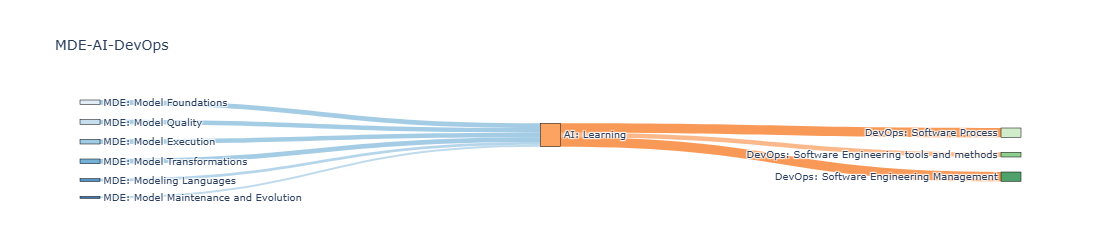

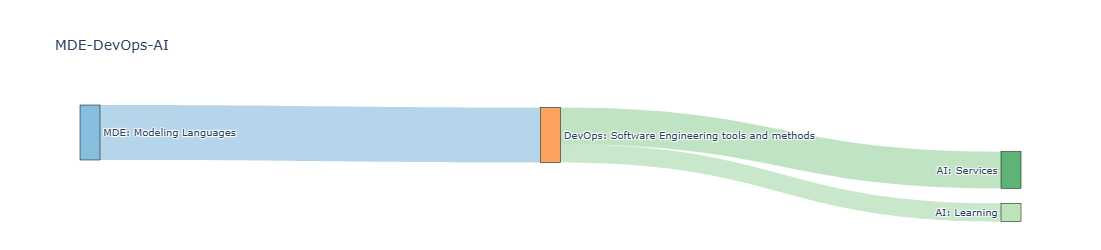

No path for AI-DevOps-MDE


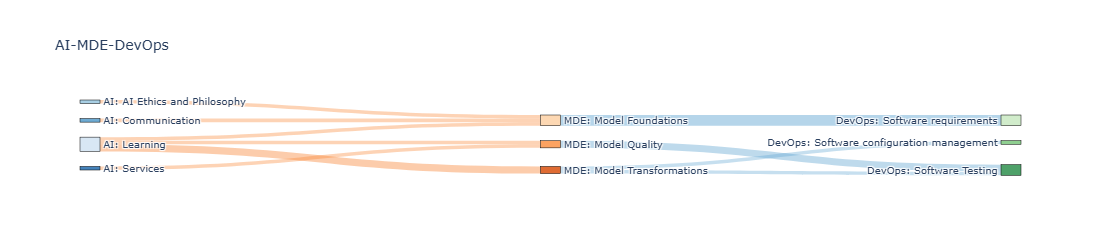

No path for DevOps-AI-MDE
No path for DevOps-MDE-AI


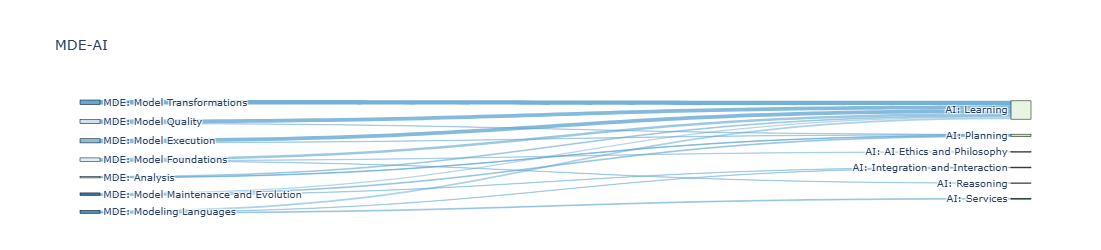

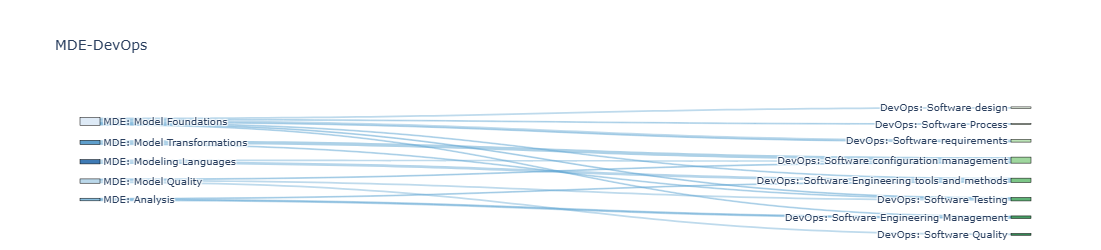

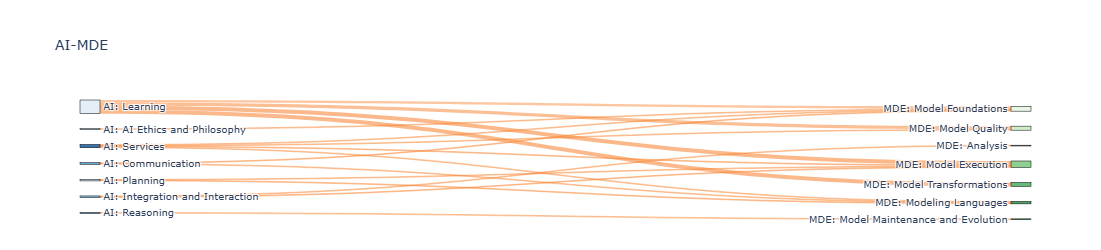

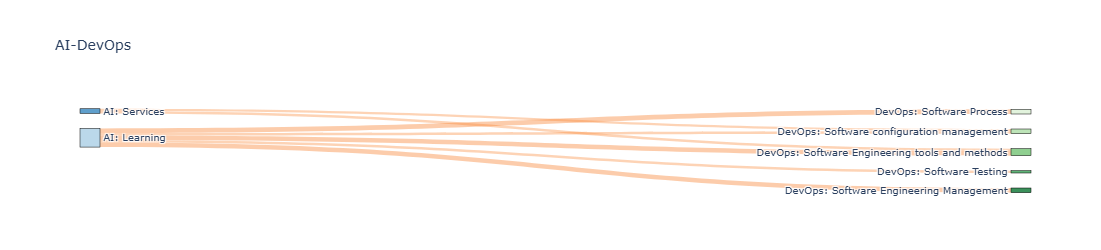

No flows for DevOps-MDE


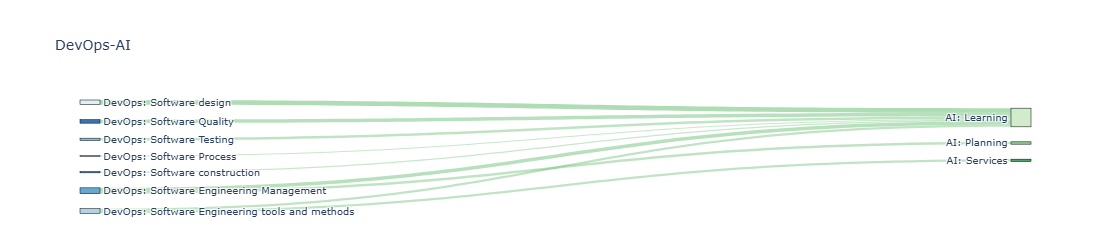

In [106]:
import plotly.graph_objects as go
from collections import defaultdict
import seaborn as sns

# Utility function to convert a Seaborn palette into a list of "rgba" strings.
def convert_palette(palette, alpha=0.8):
    return [f"rgba({int(r*255)},{int(g*255)},{int(b*255)},{alpha})" for (r, g, b) in palette]

# Function to determine the color of a link based on the global source group,
# modulating the opacity based on the link value.
def get_link_color_by_value(group, value):
    alpha = min(0.3 + 0.05 * value, 0.9)
    if group in MDE_indices:
        pal = sns.color_palette("Blues", 10)
        base = pal[5]
    elif group in AI_indices:
        pal = sns.color_palette("Oranges", 10)
        base = pal[5]
    elif group in DevOps_indices:
        pal = sns.color_palette("Greens", 10)
        base = pal[5]
    else:
        base = (0.5, 0.5, 0.5)
    return f"rgba({int(base[0]*255)},{int(base[1]*255)},{int(base[2]*255)},{alpha})"

# ================================
# 1. Define global nodes
# ================================
global_node_labels = [
    # MDE (7 nodes): indices 0–6
    "MDE: Model Foundations",         # 0
    "MDE: Model Quality",             # 1
    "MDE: Analysis",                  # 2
    "MDE: Model Execution",           # 3
    "MDE: Model Transformations",     # 4
    "MDE: Modeling Languages",        # 5
    "MDE: Model Maintenance and Evolution",  # 6
    # AI (8 nodes): indices 7–14
    "AI: Learning",                   # 7
    "AI: Planning",                   # 8
    "AI: AI Ethics and Philosophy",   # 9
    "AI: Integration and Interaction",# 10
    "AI: Communication",              # 11
    "AI: Reasoning",                  # 12
    "AI: Services",                   # 13
    "AI: Software design",            # 14
    # DevOps (9 nodes): indices 15–23
    "DevOps: Software design",               # 15
    "DevOps: Software Process",              # 16
    "DevOps: Software requirements",         # 17
    "DevOps: Software configuration management", # 18
    "DevOps: Software Engineering tools and methods", # 19
    "DevOps: Software Testing",              # 20
    "DevOps: Software Engineering Management", # 21
    "DevOps: Software construction",         # 22
    "DevOps: Software Quality"               # 23
]

# Define global sets for each group.
MDE_indices = set(range(0, 7))        # 0–6
AI_indices = set(range(7, 15))        # 7–14
DevOps_indices = set(range(15, 24))   # 15–23

# ================================
# 2. List of raw flows (final list)
# ================================
# NOTE: For SP24, SP29, and SP98, replace the placeholders "?" with the correct indices.
flows = [
    # SP10
    {"sp": "SP10", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP10", "src": 2, "tgt": 8, "flow": "Analysis - Planning"},
    {"sp": "SP10", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP10", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP10", "src": 0, "tgt": 15, "flow": "Model Foundations - Software design"},

    # SP13
    {"sp": "SP13", "src": 0, "tgt": 7, "flow": "Model Foundations - Learning"},
    {"sp": "SP13", "src": 0, "tgt": 9, "flow": "Model Foundations - AI Ethics and Philosophy"},
    {"sp": "SP13", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP13", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP13", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP13", "src": 0, "tgt": 16, "flow": "Model Foundations - Software Process"},
    {"sp": "SP13", "src": 0, "tgt": 17, "flow": "Model Foundations - Software requirements"},

    # SP18
    {"sp": "SP18", "src": 5, "tgt": 19, "flow": "Modeling Languages - Software Engineering tools and methods"},
    {"sp": "SP18", "src": 21, "tgt": 8, "flow": "Software Engineering Management - Planning"},
    {"sp": "SP18", "src": 21, "tgt": 7, "flow": "Software Engineering Management - Learning"},
    {"sp": "SP18", "src": 23, "tgt": 7, "flow": "Software Quality - Learning"},
    {"sp": "SP18", "src": 19, "tgt": 7, "flow": "Software Engineering tools and methods - Learning"},
    {"sp": "SP18", "src": 19, "tgt": 13, "flow": "Software Engineering tools and methods - Services"},
    {"sp": "SP18", "src": 15, "tgt": 7, "flow": "Software design - Learning"},

    # SP20
    {"sp": "SP20", "src": 0, "tgt": 7, "flow": "Model Foundations - Learning"},
    {"sp": "SP20", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP20", "src": 6, "tgt": 8, "flow": "Model Maintenance and Evolution - Planning"},
    {"sp": "SP20", "src": 6, "tgt": 7, "flow": "Model Maintenance and Evolution - Learning"},
    {"sp": "SP20", "src": 6, "tgt": 10, "flow": "Model Maintenance and Evolution - Integration and Interaction"},
    {"sp": "SP20", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP20", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP20", "src": 4, "tgt": 18, "flow": "Model Transformations - Software configuration management"},

    # SP32
    {"sp": "SP32", "src": 0, "tgt": 7, "flow": "Model Foundations - Learning"},
    {"sp": "SP32", "src": 5, "tgt": 7, "flow": "Modeling Languages - Learning"},
    {"sp": "SP32", "src": 5, "tgt": 10, "flow": "Modeling Languages - Integration and Interaction"},
    {"sp": "SP32", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP32", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP32", "src": 5, "tgt": 18, "flow": "Modeling Languages - Software configuration management"},
    {"sp": "SP32", "src": 22, "tgt": 7, "flow": "Software construction - Learning"},
    {"sp": "SP32", "src": 24, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP32", "src": 15, "tgt": 7, "flow": "Software design - Learning"},

    # SP40
    {"sp": "SP40", "src": 25, "tgt": 9, "flow": "Model Foundations - AI Ethics and Philosophy"},
    {"sp": "SP40", "src": 26, "tgt": 10, "flow": "Model Quality - Integration and Interaction"},
    {"sp": "SP40", "src": 27, "tgt": 10, "flow": "Model Maintenance and Evolution - Integration and Interaction"},
    {"sp": "SP40", "src": 27, "tgt": 13, "flow": "Model Maintenance and Evolution - Services"},
    {"sp": "SP40", "src": 24, "tgt": 10, "flow": "Model Execution - Integration and Interaction"},
    {"sp": "SP40", "src": 25, "tgt": 14, "flow": "Model Foundations - Software design"},

    # SP50
    {"sp": "SP50", "src": 12, "tgt": 6, "flow": "Reasoning - Model Maintenance and Evolution"},
    {"sp": "SP50", "src": 7, "tgt": 3, "flow": "Learning - Model Execution"},
    {"sp": "SP50", "src": 7, "tgt": 4, "flow": "Learning - Model Transformations"},
    {"sp": "SP50", "src": 0, "tgt": 19, "flow": "Model Foundations - Software Engineering tools and methods"},
    {"sp": "SP50", "src": 1, "tgt": 18, "flow": "Model Quality - Software configuration management"},
    {"sp": "SP50", "src": 1, "tgt": 20, "flow": "Model Quality - Software Testing"},
    {"sp": "SP50", "src": 7, "tgt": 18, "flow": "Learning - Software configuration management"},
    {"sp": "SP50", "src": 13, "tgt": 18, "flow": "Services - Software configuration management"},

    # SP52
    {"sp": "SP52", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP52", "src": 2, "tgt": 7, "flow": "Analysis - Learning"},
    {"sp": "SP52", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP52", "src": 0, "tgt": 15, "flow": "Model Foundations - Software design"},

    # SP67
    {"sp": "SP67", "src": 0, "tgt": 7, "flow": "Model Foundations - Learning"},
    {"sp": "SP67", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP67", "src": 6, "tgt": 7, "flow": "Model Maintenance and Evolution - Learning"},
    {"sp": "SP67", "src": 3, "tgt": 8, "flow": "Model Execution - Planning"},
    {"sp": "SP67", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP67", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP67", "src": 7, "tgt": 21, "flow": "Learning - Software Engineering Management"},
    {"sp": "SP67", "src": 7, "tgt": 16, "flow": "Learning - Sofware Process"},

    # SP84
    {"sp": "SP84", "src": 7, "tgt": 0, "flow": "Learning - Model Foundations"},
    {"sp": "SP84", "src": 11, "tgt": 0, "flow": "Communication - Model Foundations"},
    {"sp": "SP84", "src": 9, "tgt": 0, "flow": "AI Ethics and Philosophy - Model Foundations"},
    {"sp": "SP84", "src": 7, "tgt": 1, "flow": "Learning - Model Quality"},
    {"sp": "SP84", "src": 7, "tgt": 3, "flow": "Learning - Model Execution"},
    {"sp": "SP84", "src": 7, "tgt": 4, "flow": "Learning - Model Transformations"},
    {"sp": "SP84", "src": 0, "tgt": 17, "flow": "Model Foundations - Software requirements"},

    # SP93
    {"sp": "SP93", "src": 1, "tgt": 8, "flow": "Model Quality - Planning"},
    {"sp": "SP93", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP93", "src": 5, "tgt": 7, "flow": "Modeling Languages - Learning"},
    {"sp": "SP93", "src": 5, "tgt": 13, "flow": "Modeling Languages - Services"},
    {"sp": "SP93", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP93", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP93", "src": 5, "tgt": 19, "flow": "Modeling Languages - Software Engineering tools and methods"},
    {"sp": "SP93", "src": 21, "tgt": 8, "flow": "Software Engineering Management - Planning"},
    {"sp": "SP93", "src": 21, "tgt": 7, "flow": "Software Engineering Management - Learning"},
    {"sp": "SP93", "src": 20, "tgt": 7, "flow": "Software Testing - Learning"},
    {"sp": "SP93", "src": 23, "tgt": 7, "flow": "Software Quality - Learning"},
    {"sp": "SP93", "src": 19, "tgt": 13, "flow": "Software Engineering tools and methods - Services"},
    {"sp": "SP93", "src": 15, "tgt": 7, "flow": "Software design - Learning"},

    # SP94
    {"sp": "SP94", "src": 7, "tgt": 0, "flow": "Learning - Model Foundations"},
    {"sp": "SP94", "src": 13, "tgt": 0, "flow": "Services - Model Foundations"},
    {"sp": "SP94", "src": 7, "tgt": 1, "flow": "Learning - Model Quality"},
    {"sp": "SP94", "src": 13, "tgt": 1, "flow": "Services - Model Quality"},
    {"sp": "SP94", "src": 8, "tgt": 5, "flow": "Planning - Modeling Languages"},
    {"sp": "SP94", "src": 13, "tgt": 5, "flow": "Services - Modeling Languages"},
    {"sp": "SP94", "src": 7, "tgt": 3, "flow": "Learning - Model Execution"},
    {"sp": "SP94", "src": 13, "tgt": 3, "flow": "Services - Model Execution"},
    {"sp": "SP94", "src": 7, "tgt": 4, "flow": "Learning - Model Transformations"},
    {"sp": "SP94", "src": 1, "tgt": 20, "flow": "Model Quality - Software Testing"},

    # SP101
    {"sp": "SP101", "src": 0, "tgt": 7, "flow": "Model Foundations - Learning"},
    {"sp": "SP101", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP101", "src": 5, "tgt": 7, "flow": "Modeling Languages - Learning"},
    {"sp": "SP101", "src": 5, "tgt": 13, "flow": "Modeling Languages - Services"},
    {"sp": "SP101", "src": 6, "tgt": 7, "flow": "Model Maintenance and Evolution - Learning"},
    {"sp": "SP101", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP101", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP101", "src": 5, "tgt": 18, "flow": "Modeling Languages - Software configuration management"},
    {"sp": "SP101", "src": 21, "tgt": 7, "flow": "Software Engineering Management - Learning"},
    {"sp": "SP101", "src": 20, "tgt": 7, "flow": "Software Testing - Learning"},
    {"sp": "SP101", "src": 16, "tgt": 7, "flow": "Sofware Process - Learning"},
    {"sp": "SP101", "src": 23, "tgt": 7, "flow": "Software Quality - Learning"},
    {"sp": "SP101", "src": 19, "tgt": 7, "flow": "Software Engineering tools and methods - Learning"},
    {"sp": "SP101", "src": 15, "tgt": 7, "flow": "Software design - Learning"},

    # SP142
    {"sp": "SP142", "src": 7, "tgt": 1, "flow": "Learning - Model Quality"},
    {"sp": "SP142", "src": 10, "tgt": 2, "flow": "Integration and Interaction - Analysis"},
    {"sp": "SP142", "src": 8, "tgt": 3, "flow": "Planning - Model Execution"},
    {"sp": "SP142", "src": 7, "tgt": 3, "flow": "Learning - Model Execution"},
    {"sp": "SP142", "src": 10, "tgt": 3, "flow": "Integration and Interaction - Model Execution"},
    {"sp": "SP142", "src": 7, "tgt": 4, "flow": "Learning - Model Transformations"},
    {"sp": "SP142", "src": 4, "tgt": 20, "flow": "Model Transformations - Software Testing"},

    # SP161
    {"sp": "SP161", "src": 7, "tgt": 0, "flow": "Learning - Model Foundations"},
    {"sp": "SP161", "src": 7, "tgt": 1, "flow": "Learning - Model Quality"},
    {"sp": "SP161", "src": 11, "tgt": 5, "flow": "Communication - Modeling Languages"},
    {"sp": "SP161", "src": 7, "tgt": 3, "flow": "Learning - Model Execution"},
    {"sp": "SP161", "src": 7, "tgt": 4, "flow": "Learning - Model Transformations"},
    {"sp": "SP161", "src": 4, "tgt": 18, "flow": "Model Transformations - Software configuration management"},

    # SP170
    {"sp": "SP170", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP170", "src": 2, "tgt": 7, "flow": "Analysis - Learning"},
    {"sp": "SP170", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP170", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP170", "src": 2, "tgt": 19, "flow": "Analysis - Software Engineering tools and methods"},

    # SP171
    {"sp": "SP171", "src": 0, "tgt": 7, "flow": "Model Foundations - Learning"},
    {"sp": "SP171", "src": 1, "tgt": 7, "flow": "Model Quality - Learning"},
    {"sp": "SP171", "src": 5, "tgt": 7, "flow": "Modeling Languages - Learning"},
    {"sp": "SP171", "src": 6, "tgt": 8, "flow": "Model Maintenance and Evolution - Planning"},
    {"sp": "SP171", "src": 3, "tgt": 7, "flow": "Model Execution - Learning"},
    {"sp": "SP171", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"},
    {"sp": "SP171", "src": 7, "tgt": 21, "flow": "Learning - Software Engineering Management"},
    {"sp": "SP171", "src": 7, "tgt": 16, "flow": "Learning - Sofware Process"},
    {"sp": "SP171", "src": 7, "tgt": 19, "flow": "Learning - Software Engineering tools and methods"},

    # SP24 (replace placeholders with correct indices)
    {"sp": "SP24", "src": 13, "tgt": 19, "flow": "Services - Software Engineering tools and methods"},
    {"sp": "SP24", "src": 0, "tgt": 20, "flow": "Model Foundations - Software Testing"},
    {"sp": "SP24", "src": 1, "tgt": 23, "flow": "Model Quality - Software Quality"},
    {"sp": "SP24", "src": 2, "tgt": 21, "flow": "Analysis - Software Project Enactment"},
    {"sp": "SP24", "src": 4, "tgt": 18, "flow": "Model Transformations - Software configuration management"},

    # SP29 (replace placeholders with correct indices)
    {"sp": "SP29", "src": 7, "tgt": 20, "flow": "Learning - Software Testing"},
    {"sp": "SP29", "src": 7, "tgt": 19, "flow": "Learning - Software Engineering tools and methods"},
    {"sp": "SP29", "src": 0, "tgt": 17, "flow": "Model Foundations - Software Requirements"},
    {"sp": "SP29", "src": 1, "tgt": 23, "flow": "Model Quality - Software Quality"},
    {"sp": "SP29", "src": 5, "tgt": 19, "flow": "Modeling Languages - Software Engineering tools and methods"},

    # SP98 (replace placeholders with correct indices)
    {"sp": "SP98", "src": 0, "tgt": 21, "flow": "Model Foundations - Software configuration management"},
    {"sp": "SP98", "src": 4, "tgt": 18, "flow": "Model Transformations - Software configuration management"},
    {"sp": "SP98", "src": 2, "tgt": 21, "flow": "Analysis - Software Engineering Management"},
    {"sp": "SP98", "src": 0, "tgt": 12, "flow": "Model Foundations - Reasoning"},
    {"sp": "SP98", "src": 2, "tgt": 8, "flow": "Analysis – Planning"},
    {"sp": "SP98", "src": 4, "tgt": 7, "flow": "Model Transformations - Learning"}
]

# ================================
# 3. Function to build and aggregate chains (for 3-group diagrams)
# ================================
def get_chains_for_combination(flows, group_left, group_center, group_right):
    chains = []
    sp_dict = defaultdict(list)
    for f in flows:
        sp_dict[f["sp"]].append(f)
    for sp, flist in sp_dict.items():
        seg1 = [f for f in flist if f["src"] in group_left and f["tgt"] in group_center]
        seg2 = [f for f in flist if f["src"] in group_center and f["tgt"] in group_right]
        for f1 in seg1:
            for f2 in seg2:
                if f1["tgt"] == f2["src"]:
                    chains.append({
                        "sp": sp,
                        "left": f1["src"],
                        "center": f1["tgt"],
                        "right": f2["tgt"],
                        "flow1": f1["flow"],
                        "flow2": f2["flow"]
                    })
    return chains

def aggregate_chains(chains):
    agg = defaultdict(lambda: {"value": 0, "sps": set()})
    for ch in chains:
        key = (ch["left"], ch["center"], ch["right"], ch["flow1"], ch["flow2"])
        agg[key]["value"] += 1
        agg[key]["sps"].add(ch["sp"])
    aggregated = []
    for key, data in agg.items():
        left, center, right, flow1, flow2 = key
        aggregated.append({
            "left": left,
            "center": center,
            "right": right,
            "flow1": flow1,
            "flow2": flow2,
            "value": data["value"],
            "sps": data["sps"]
        })
    return aggregated

# ================================
# 4A. Function to build a Sankey diagram for 3-group combinations
# ================================
def build_sankey_for_combination(title, group_left, group_center, group_right):
    chains = get_chains_for_combination(flows, group_left, group_center, group_right)
    aggregated = aggregate_chains(chains)
    if not aggregated:
        print(f"No path for {title}")
        return None

    left_nodes = sorted({edge["left"] for edge in aggregated})
    center_nodes = sorted({edge["center"] for edge in aggregated})
    right_nodes = sorted({edge["right"] for edge in aggregated})

    left_labels = [global_node_labels[i] for i in left_nodes]
    center_labels = [global_node_labels[i] for i in center_nodes]
    right_labels = [global_node_labels[i] for i in right_nodes]

    mapping = {}
    for i, idx in enumerate(left_nodes):
        mapping[idx] = i
    for i, idx in enumerate(center_nodes):
        mapping[idx] = len(left_nodes) + i
    for i, idx in enumerate(right_nodes):
        mapping[idx] = len(left_nodes) + len(center_nodes) + i

    local_node_labels = left_labels + center_labels + right_labels

    # Aggregate links for the two segments
    agg_links_1 = defaultdict(lambda: {"value": 0, "sps": set(), "flow": None, "global_src": None})
    agg_links_2 = defaultdict(lambda: {"value": 0, "sps": set(), "flow": None, "global_src": None})
    for edge in aggregated:
        key1 = (edge["left"], edge["center"], edge["flow1"])
        agg_links_1[key1]["value"] += edge["value"]
        agg_links_1[key1]["sps"].update(edge["sps"])
        agg_links_1[key1]["flow"] = edge["flow1"]
        agg_links_1[key1]["global_src"] = edge["left"]
        key2 = (edge["center"], edge["right"], edge["flow2"])
        agg_links_2[key2]["value"] += edge["value"]
        agg_links_2[key2]["sps"].update(edge["sps"])
        agg_links_2[key2]["flow"] = edge["flow2"]
        agg_links_2[key2]["global_src"] = edge["center"]

    link_sources = []
    link_targets = []
    link_values = []
    link_labels = []
    link_colors = []
    for (src, tgt, flow_desc), data in agg_links_1.items():
        link_sources.append(mapping[src])
        link_targets.append(mapping[tgt])
        link_values.append(data["value"])
        link_labels.append(','.join(f'[{x}]' for x in sorted(data['sps'])))
        link_colors.append(get_link_color_by_value(data["global_src"], data["value"]))
    for (src, tgt, flow_desc), data in agg_links_2.items():
        link_sources.append(mapping[src])
        link_targets.append(mapping[tgt])
        link_values.append(data["value"])
        link_labels.append(','.join(f'[{x}]' for x in sorted(data['sps'])))
        link_colors.append(get_link_color_by_value(data["global_src"], data["value"]))

    n_left = len(left_labels)
    n_center = len(center_labels)
    n_right = len(right_labels)
    node_x = ([0.0] * n_left) + ([0.5] * n_center) + ([1.0] * n_right)
    node_y = []
    for n in [n_left, n_center, n_right]:
        if n > 1:
            node_y += [i/(n-1) for i in range(n)]
        else:
            node_y += [0.5]

    fig = go.Figure(data=[go.Sankey(
        arrangement="snap",
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=local_node_labels,
            x=node_x,
            y=node_y,
            color=(
                convert_palette(sns.color_palette("Blues", n_left)) +
                convert_palette(sns.color_palette("Oranges", n_center)) +
                convert_palette(sns.color_palette("Greens", n_right))
            )
        ),
        link=dict(
            source=link_sources,
            target=link_targets,
            value=link_values,
            customdata=link_labels,
            hovertemplate=(
                "ID SP: %{customdata}<br>" +
                "Value: %{value}<extra></extra>"
            ),
            color=link_colors
        )
    )])
    fig.update_layout(
        title_text=title,
        font_size=10,
        width=900,
        height=250
    )
    return fig

# ================================
# 4B. Function to build a Sankey diagram for 2-group combinations
# ================================
def build_sankey_for_2groups(title, group_left, group_right):
    # Select flows with src in group_left and tgt in group_right.
    selected = [f for f in flows if f["src"] in group_left and f["tgt"] in group_right]
    if not selected:
        print(f"No flows for {title}")
        return None
    # Aggregate by key (src, tgt, flow)
    agg = defaultdict(lambda: {"value": 0, "sps": set()})
    for f in selected:
        key = (f["src"], f["tgt"], f["flow"])
        agg[key]["value"] += 1
        agg[key]["sps"].add(f["sp"])
    aggregated = []
    for key, data in agg.items():
        src, tgt, flow = key
        aggregated.append({
            "src": src,
            "tgt": tgt,
            "flow": flow,
            "value": data["value"],
            "sps": data["sps"]
        })
    left_nodes = sorted({edge["src"] for edge in aggregated})
    right_nodes = sorted({edge["tgt"] for edge in aggregated})
    left_labels = [global_node_labels[i] for i in left_nodes]
    right_labels = [global_node_labels[i] for i in right_nodes]
    mapping_left = {idx: i for i, idx in enumerate(left_nodes)}
    mapping_right = {idx: i for i, idx in enumerate(right_nodes)}
    local_node_labels = left_labels + right_labels

    link_sources = []
    link_targets = []
    link_values = []
    link_labels = []
    link_colors = []
    for (src, tgt, flow), data in agg.items():
        link_sources.append(mapping_left[src])
        link_targets.append(len(left_labels) + mapping_right[tgt])
        link_values.append(data["value"])
        link_labels.append(','.join(f'[{x}]' for x in sorted(data["sps"])))
        link_colors.append(get_link_color_by_value(src, data["value"]))
    n_left = len(left_labels)
    n_right = len(right_labels)
    node_x = ([0.0] * n_left) + ([1.0] * n_right)
    def get_y_positions(n):
        return [i/(n+1) for i in range(1, n+1)]
    node_y = get_y_positions(n_left) + get_y_positions(n_right)

    fig = go.Figure(data=[go.Sankey(
        arrangement="snap",
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=local_node_labels,
            x=node_x,
            y=node_y,
            color=(
                convert_palette(sns.color_palette("Blues", n_left)) +
                convert_palette(sns.color_palette("Greens", n_right))
            )
        ),
        link=dict(
            source=link_sources,
            target=link_targets,
            value=link_values,
            customdata=link_labels,
            hovertemplate=(
                "ID SP: %{customdata}<br>" +
                "Value: %{value}<extra></extra>"
            ),
            color=link_colors
        )
    )])
    fig.update_layout(
        title_text=title,
        font_size=10,
        width=850,
        height=250
    )
    return fig

# ================================
# 5. Define combinations
# ================================
# 3-group combinations (6 diagrams)
three_group_combinations = [
    ("MDE-AI-DevOps", MDE_indices, AI_indices, DevOps_indices),
    ("MDE-DevOps-AI", MDE_indices, DevOps_indices, AI_indices),
    ("AI-DevOps-MDE", AI_indices, DevOps_indices, MDE_indices),
    ("AI-MDE-DevOps", AI_indices, MDE_indices, DevOps_indices),
    ("DevOps-AI-MDE", DevOps_indices, AI_indices, MDE_indices),
    ("DevOps-MDE-AI", DevOps_indices, MDE_indices, AI_indices)
]

# 2-group combinations (6 diagrams)
two_group_combinations = [
    ("MDE-AI", MDE_indices, AI_indices),
    ("MDE-DevOps", MDE_indices, DevOps_indices),
    ("AI-MDE", AI_indices, MDE_indices),
    ("AI-DevOps", AI_indices, DevOps_indices),
    ("DevOps-MDE", DevOps_indices, MDE_indices),
    ("DevOps-AI", DevOps_indices, AI_indices)
]

# ================================
# 6. Build and display Sankey diagrams
# ================================
figures = {}

# 3-group diagrams
for title, left_set, center_set, right_set in three_group_combinations:
    fig = build_sankey_for_combination(title, left_set, center_set, right_set)
    if fig is not None:
        figures[title] = fig
        fig.show()

        png_filename = f"{title}.png"
        html_filename = f"{title}.html"
        
        fig.write_image(png_filename, engine="orca")
        fig.write_html(html_filename)

# 2-group diagrams
for title, group_left, group_right in two_group_combinations:
    fig = build_sankey_for_2groups(title, group_left, group_right)
    if fig is not None:
        figures[title] = fig
        fig.show()

        png_filename = f"{title}.png"
        html_filename = f"{title}.html"
        
        fig.write_image(png_filename, engine="orca")
        fig.write_html(html_filename)